In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt 

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import accuracy_score,log_loss,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
bankloan = pd.read_csv("bankloan.csv",index_col=0)
bankloan.head(10)

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [3]:
bankloan.tail(10)

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,,,,,,,,,,,,,
4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0


In [4]:
bankloan.shape

(5000, 13)

In [5]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP.Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal.Loan       5000 non-null   int64  
 9   Securities.Account  5000 non-null   int64  
 10  CD.Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [6]:
bankloan.describe()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
bankloan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
bankloan['Personal.Loan'].value_counts()

Personal.Loan
0    4520
1     480
Name: count, dtype: int64

## LogisticRegression

In [9]:
#Training Accuracy
x = bankloan.drop(['ZIP.Code','Personal.Loan'],axis=1)
y = bankloan['Personal.Loan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                               stratify=y,
                               random_state=23)

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)
print("Accuracy score :",accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

Accuracy score : 0.9474285714285714
[[3117   47]
 [ 137  199]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3164
           1       0.81      0.59      0.68       336

    accuracy                           0.95      3500
   macro avg       0.88      0.79      0.83      3500
weighted avg       0.94      0.95      0.94      3500



In [29]:
#Testing Accuracy
x = bankloan.drop(['ZIP.Code','Personal.Loan'],axis=1)
y = bankloan['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                               stratify=y,
                               random_state=23)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_prob = (lr.predict_proba(x_test))[:,1]
print("Accuracy score :",accuracy_score(y_test, y_pred))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred_prob))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score : 0.9493333333333334
0.9462829809898393
[[1331   25]
 [  51   93]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.79      0.65      0.71       144

    accuracy                           0.95      1500
   macro avg       0.88      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## LogisticRegression with Tuning

In [10]:
x = bankloan.drop(['ZIP.Code','Personal.Loan'],axis=1)
y = bankloan['Personal.Loan']

skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
lr = LogisticRegression()

params = {'penalty':['l1','l2','elasticnet',None],
          'l1_ratio':np.linspace(0,1,5),
          'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'multi_class':['ovr','multinomial']}

gcv = GridSearchCV(lr,param_grid=params,cv=skfold,return_train_score=True)
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)
print(gcv.cv_results_)

{'l1_ratio': 0.0, 'multi_class': 'ovr', 'penalty': None, 'solver': 'newton-cg'}
0.952
{'mean_fit_time': array([4.01258469e-04, 2.28293562e-01, 7.99846649e-04, 3.99971008e-04,
       1.01194382e-03, 6.44738674e-02, 4.24506187e-02, 1.42486095e-02,
       1.67654181e-01, 7.71403313e-03, 4.69331264e-02, 5.05706310e-02,
       1.04236603e-03, 6.00147247e-04, 2.00319290e-04, 1.05423927e-03,
       8.00085068e-04, 5.02978802e-02, 3.92595768e-02, 1.79691315e-03,
       1.73808193e-01, 7.49402046e-03, 4.80482578e-02, 4.97584820e-02,
       8.15153122e-04, 1.19833946e-03, 1.87158585e-04, 0.00000000e+00,
       3.99971008e-04, 1.03277111e-01, 3.37758541e-02, 1.40342712e-03,
       1.74006224e-01, 1.59740448e-03, 7.06141472e-02, 7.54698753e-02,
       1.00955963e-03, 8.00228119e-04, 1.10373497e-03, 1.99985504e-04,
       8.15296173e-04, 7.33134747e-02, 3.38039875e-02, 1.00769997e-03,
       1.75701857e-01, 1.20120049e-03, 6.90917015e-02, 7.55036354e-02,
       5.99479675e-04, 2.02275324e-01, 9.984

In [11]:
df = pd.DataFrame(gcv.cv_results_)
df.columns
df['mean_train_score'].max()

0.952

In [12]:
lr=LogisticRegression(penalty=None, solver ='newton-cg',multi_class='ovr')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
print(accuracy_score(y_train, y_pred))

#tuning train 0.9497142857142857

0.9497142857142857


In [13]:
lr.score(x_train,y_train)

0.9497142857142857

# KNN

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)
accuracy = accuracy_score(y_test,y_pred)
log_los = log_loss(y_test,y_pred_proba)
print("Accuracy score : ",accuracy)
print("Log Loss : ",log_los)

Accuracy score :  0.9033333333333333
Log Loss :  3.4842198276146585


## KNN With Parameter Tuning

In [15]:
skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
knn = KNeighborsClassifier()

params = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,27,29,31]}
gcv = GridSearchCV(knn,param_grid=params,cv=skfold)
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'n_neighbors': 5}
0.9122


# Naive Bayes

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
y_pred_prob = gnb.predict_proba(x_test)
print("Accuracy Scare : ",accuracy_score(y_test,y_pred))
print("Log Lass ",log_loss(y_test,y_pred_prob))

Accuracy Scare :  0.894
Log Lass  0.3760260272166353


# Naive Bayes with Tuning

In [17]:
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=23)
params = {'var_smoothing':np.linspace(1e-9,2,20)}
gcv = GridSearchCV(gnb,param_grid=params,cv = skfold)
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'var_smoothing': 1.7894736843157895}
0.9062000000000001


# SVM

In [18]:
svm = SVC(kernel='linear',probability=True,random_state=23)# generally probability not taken
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_prob = svm.predict_proba(x_test)
print("Accuracy Scare : ",accuracy_score(y_test,y_pred))
print("Log Lass ",log_loss(y_test,y_pred_prob))

Accuracy Scare :  0.9533333333333334
Log Lass  0.13587789485912546


# SVM with Tuning

In [37]:
svm = SVC()
params = {'C':np.linspace(0.0001,10,20),
          'kernel' : ['linear','poly','rbf'],
          'coef0':np.linspace(0,5,10),
          'degree':[2,3],
          }
skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

gcv_stdsvc = GridSearchCV(svm,param_grid=params,cv=skfold)
gcv_stdsvc.fit(x,y)
print("\nBest Parameters : ",gcv_stdsvc.best_params_)
print("Best Accuracy Score : ",gcv_stdsvc.best_score_)

# Decision Tree

Accuracy Score :  0.984
Log loss : 0.5766984542258747


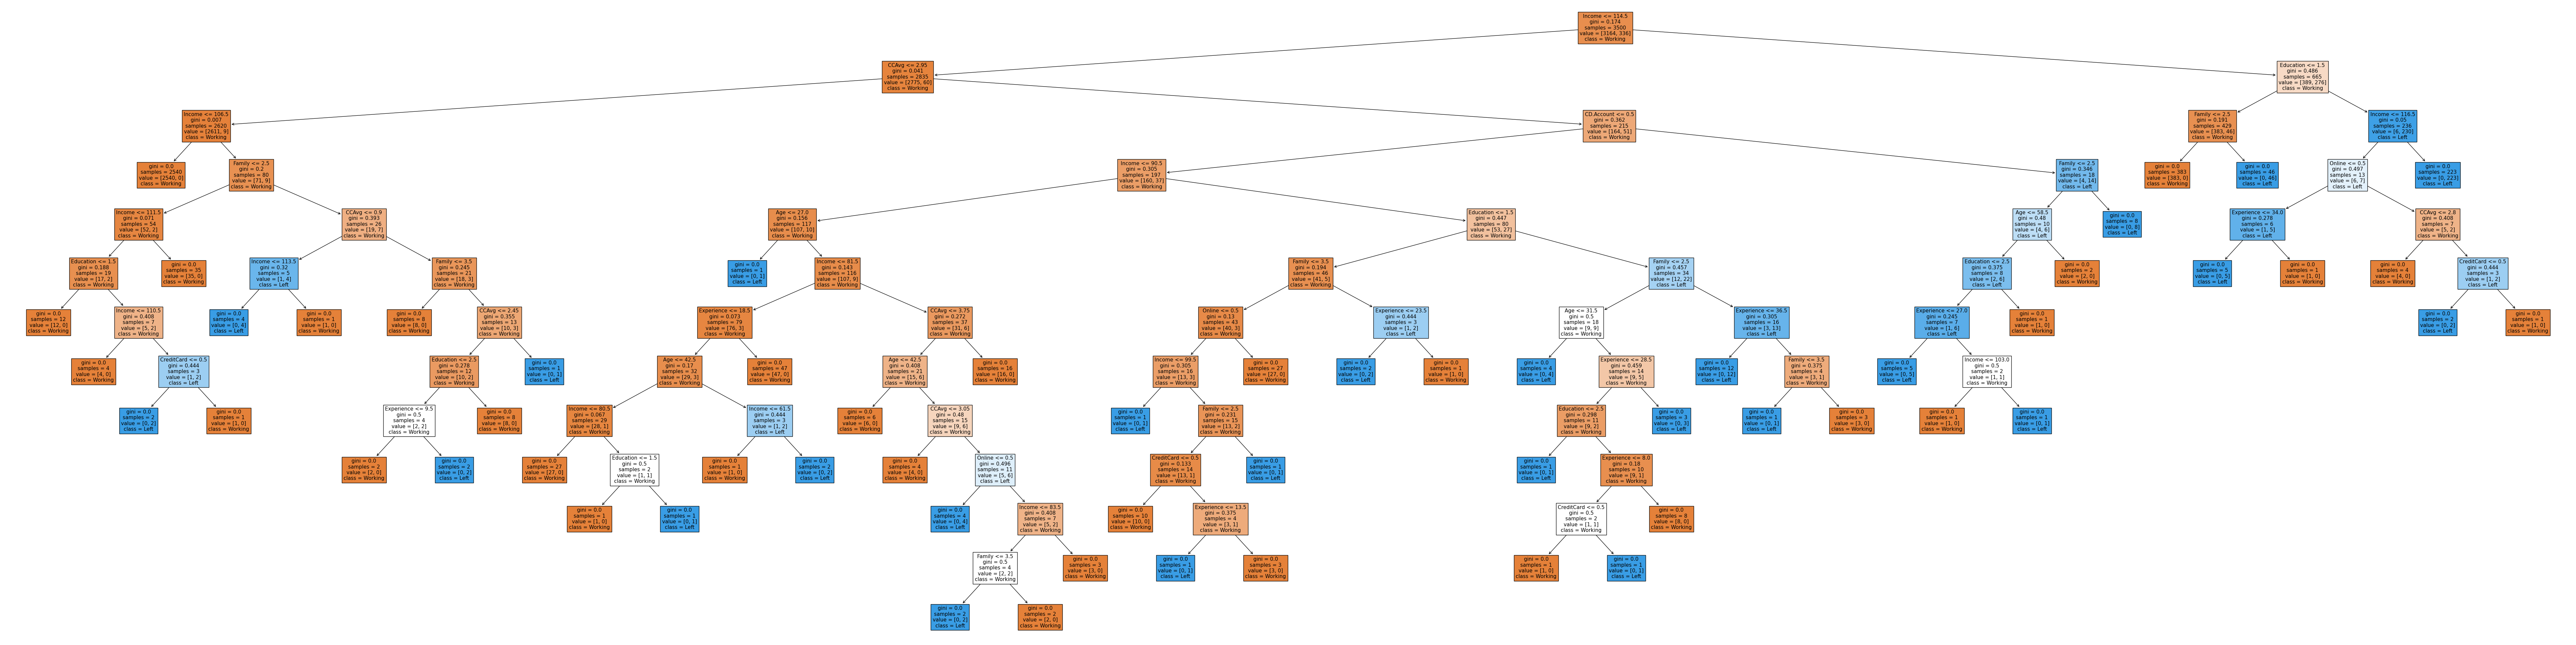

In [28]:
dtc = DecisionTreeClassifier(random_state=23)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y_pred_prob = dtc.predict_proba(x_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("Log loss :",log_loss(y_test,y_pred_prob))

plt.figure(figsize=(100,25))
plot_tree(dtc,feature_names=list(x.columns),class_names=['Working','Left'],filled=True,fontsize=11)
plt.show()

# Decision Tree with Tuning

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9854
DecisionTreeClassifier(random_state=23)


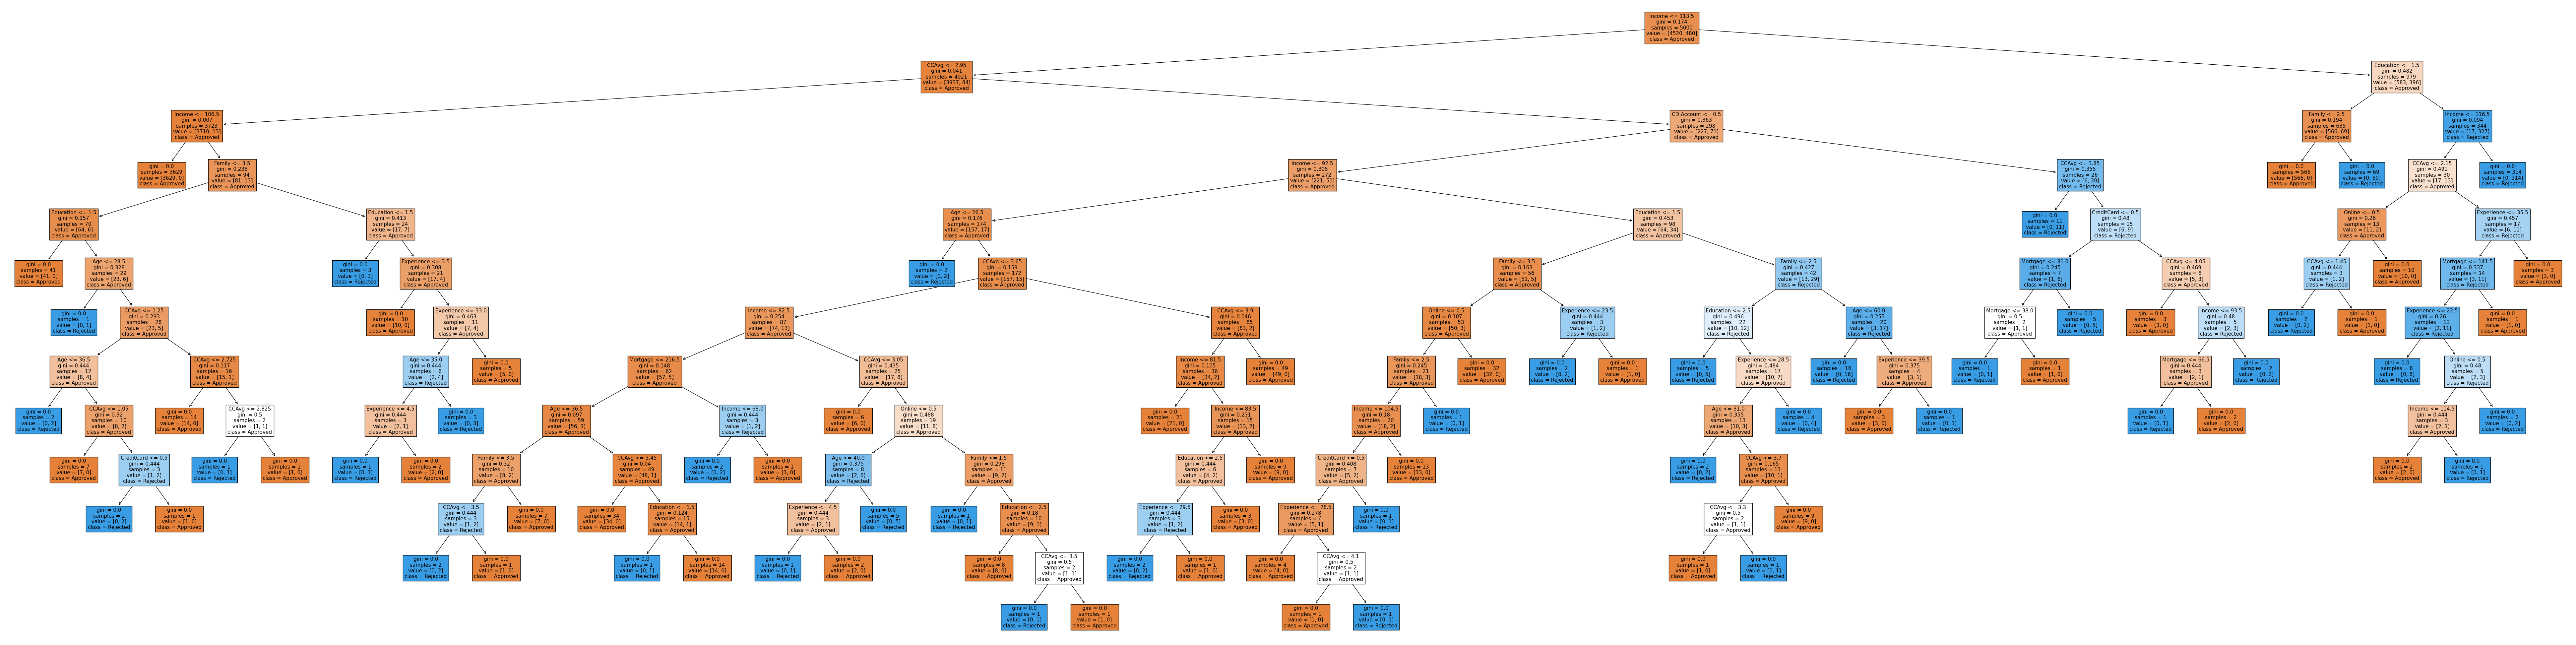

In [36]:
params = {'max_depth':[3,4,5,6,7,8,None],
          'min_samples_split':[2,5,10,20,80,100],
          'min_samples_leaf':[1,5,10,20]}
dtc = DecisionTreeClassifier(random_state=23)

gcv_dtc = GridSearchCV(dtc,param_grid=params,cv=skfold)
gcv_dtc.fit(x,y)
print(gcv_dtc.best_params_)
print(gcv_dtc.best_score_)
print(gcv_dtc.best_estimator_)

plt.figure(figsize=(100,25))
plot_tree(gcv_dtc.best_estimator_,feature_names=list(x.columns),class_names=['Approved','Rejected'],filled=True,fontsize=11)
plt.show()